# Biblioteki oraz dane

In [2]:
#Wczytujemy biblioteki
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt

In [3]:
#Wczytujemy dane - baza po obróbce wstępnej, gdzie usunięto puste rekordy oraz duplikaty
df = pd.read_csv("https://raw.githubusercontent.com/adamPaclawski/AGH_DataScience_2021/master/Model_development_part1/curated_solubility_database_2021.csv", index_col=0)

In [4]:
df

,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,logS
Name,,,,,,,,,,,,,,,,,,,,,
"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.95810,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000,210.377334,-3.616127
2-methyl-N-[(2-methylprop-2-enamido)methyl]prop-2-enamide,InChI=1S/C9H14N2O2/c1-6(2)8(12)10-5-11-9(13)7(...,TURITJIWSQEMDB-UHFFFAOYSA-N,CC(=C)C(=O)NCNC(=O)C(C)=C,182.223,0.32850,50.7804,13.0,2.0,2.0,4.0,4.0,72.0,0.0,0.0,0.0,0.0,58.20,77.702350,3.689373,230.340316,-1.189237
"(1Z,5Z)-cycloocta-1,5-diene","InChI=1S/C8H12/c1-2-4-6-8-7-5-3-1/h1-2,7-8H,3-...",VYXHVRARDIDEHS-QGTKBVGQSA-N,C\1C\C=C/CC\C=C1,108.184,2.67280,36.7480,8.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,1.0,1.0,0.00,50.908809,2.285714,72.605938,-2.965977
(3-isocyanatopropyl)trimethoxysilane,"InChI=1S/C7H15NO4Si/c1-10-13(11-2,12-3)6-4-5-8...",FMGBDYLOANULLW-UHFFFAOYSA-N,CO[Si](CCCN=C=O)(OC)OC,205.286,0.59040,49.1935,13.0,5.0,0.0,6.0,7.0,76.0,0.0,0.0,0.0,0.0,57.12,79.077357,3.873429,169.066693,-3.256981
(3-chloropropyl)triethoxysilane,"InChI=1S/C9H21ClO3Si/c1-4-11-14(12-5-2,13-6-3)...",KSCAZPYHLGGNPZ-UHFFFAOYSA-N,CCO[Si](CCCCl)(OCC)OCC,240.803,2.66370,60.7760,14.0,3.0,0.0,5.0,9.0,86.0,0.0,0.0,0.0,0.0,27.69,93.053663,4.210670,118.205924,-3.328583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,264.369,2.61700,78.6762,19.0,4.0,1.0,4.0,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548,374.236893,-3.010000
tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,444.440,-0.21440,109.5409,32.0,9.0,6.0,10.0,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922,1148.584975,-2.930000
thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,150.221,2.82402,46.9328,11.0,1.0,1.0,1.0,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720,251.049732,-2.190000


In [5]:
#Sprawdzamy dla pewności czy wszystkie rekordy zawierają informacje
df.isna().sum().sum()

0

In [6]:
#Sprawdzamy, które zmienne nie są numryczne
df.dtypes[df.dtypes=='object']

InChI       object
InChIKey    object
SMILES      object
dtype: object

In [7]:
#Usuwamy zmienne typu object i tworzymy tablicę zawierającą zmienne wejściowe (niezależne)
X=df.drop(['InChI', 'InChIKey', 'SMILES', 'logS'], axis=1)

In [8]:
#Tworzymy też objekt zawierający zmienną zależną: logS
Y=df["logS"]

# Regresja liniowa

In [9]:
#Tworzymy model regresji liniowej z zast. pakietu scikit-learn
regLin = linear_model.LinearRegression()

In [10]:
#Uczymy nasz model - dopasowujemy do danych
regLin.fit(y=Y, X=X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Zobaczmy strukturę naszego modelu (wartości współczynników dla poszczególnych zmiennych wejściowych)
regLin.coef_
results=pd.DataFrame(regLin.coef_, index=X.columns, columns=['Coeff_linReg'])
results

,Coeff_linReg
MolWt,-0.004690
MolLogP,-0.446149
MolMR,0.014570
HeavyAtomCount,-0.474995
NumHAcceptors,0.107732
NumHDonors,0.150284
NumHeteroatoms,-0.129766
NumRotatableBonds,0.042835
NumValenceElectrons,0.076472
NumAromaticRings,-0.309124


In [12]:
#Zestawiamy nasze predykcje oraz wartości obserwowane
y_pred=regLin.predict(X)
summary=pd.DataFrame(y_pred, columns=["Predicted"])
summary["Observed"]=Y.values
summary

,Predicted,Observed
0,-3.058858,-3.616127
1,-1.407746,-1.189237
2,-2.828340,-2.965977
3,-1.753258,-3.256981
4,-2.682526,-3.328583
...,...,...
9877,-2.750126,-3.010000
9878,-1.727595,-2.930000
9879,-2.704118,-2.190000
9880,-4.015517,-3.980000


# Miary dopasowania - błedu modelu

In [13]:
#Suma kwadratów błędów
SSE=(summary['Observed']-summary['Predicted']).pow(2).sum()

In [14]:
#Suma kwadratów błędów jest wrażliwa na ilość rekordów co tworzy trudności dla porównania różnych zbiorów
empty=[]
for i in range(1,100):
  SSE=(summary['Observed'][1000:(1000+i)]-summary['Predicted'][1000:(1000+i)]).pow(2).sum()
  empty.append(SSE)

In [15]:
#Wartość średnia sumy kwadratów błędów nie jest wrażliwa na ilość rekordów. Istotny wpływ na jej wartosć mają wartości skrajne
MSE=(summary['Observed']-summary['Predicted']).pow(2).sum()/len(summary['Predicted'])
MSE

2.719335985359472

In [16]:
#Taki sam eksperyment - oczekujemy stabilizacji błędu ze zwiększaniem liczby rekordów
empty=[]
for i in range(1,100):
  MSE=(summary['Observed'][1000:(1000+i)]-summary['Predicted'][1000:(1000+i)]).pow(2).sum()/i
  empty.append(MSE)

In [17]:
empty

[6.797303809225342,
 12.010252574860914,
 9.695465452082082,
 10.30460565474226,
 8.79245427129629,
 9.548236482029575,
 8.329572181986041,
 7.628648663707841,
 7.029911713599866,
 6.416889313082207,
 6.508587100502171,
 6.054792125726309,
 5.656118372937333,
 5.331408903013397,
 4.976535088853493,
 4.674355435313351,
 4.403062742003701,
 4.1654306524256395,
 3.9531906985364493,
 3.7932744675830934,
 3.628579583806391,
 4.161785651722642,
 4.031843881632288,
 3.868278810969508,
 3.811560081213271,
 3.7648165606377715,
 3.6586969216321497,
 3.6851340597306086,
 3.6630858553388794,
 3.608553451193464,
 3.5073633056973486,
 3.423087766455758,
 3.326450845935132,
 3.522452977364838,
 3.4637831046837015,
 3.5331283204003814,
 3.7457646221852556,
 3.6537278715798562,
 3.5766000207828337,
 3.5338631964743525,
 3.49321109530287,
 3.4488244911323442,
 3.582823883214894,
 3.5513061645385373,
 3.50999275867066,
 3.4471609044992153,
 3.5391836261822722,
 3.5035081814887516,
 3.6901988677936512,
 3

In [18]:
#Spierwiastkowana średnia sumy kwadratów błędów nie jest wrażliwa na ilość rekordów oraz jest mniej wrażliwa na wartosci skrajne. Ponadto mamy zgodność jednostek względem wartości obserwowanych.
RMSE=((summary['Observed']-summary['Predicted']).pow(2).sum()/len(summary['Predicted']))**0.5
RMSE

1.649040928952181

In [19]:
#Analizując błąd RMSE oraz zakres wartości zmiennej wyjściowej możemy oszacować wartość błędu wyrażonego jako % odległości pomiędzy wartościami min i maks
Y.describe()

count    9882.000000
mean       -2.885159
std         2.375397
min       -13.171900
25%        -4.330000
50%        -2.600000
75%        -1.199375
max         2.137682
Name: logS, dtype: float64

In [20]:
#Generując losowy zbiór danych odpowiadający pod względem rozmiarów zbioru użytego do budowy modelu możemy uzyskać punkt odniesienia względem uzyskanych wyników oraz sprawdzić jakość danych
import random
X_rand = pd.DataFrame(np.random.randint(0,100, size=X.shape), columns=X.columns)

regLin_rand = linear_model.LinearRegression()
regLin_rand.fit(X_rand, Y)
y_pred = regLin_rand.predict(X_rand)


In [22]:
summary=pd.DataFrame(y_pred, columns=["Predicted"])
summary["Observed"]=Y.values
summary
RMSE=((summary['Observed']-summary['Predicted']).pow(2).sum()/len(summary['Predicted']))**0.5
RMSE

2.372291686181104

In [24]:
#Przygotujmy własną funkcję do oceny naszych modeli. Uwzględnimy bład RMSE, NRMSE oraz wsp. determinacji R2
def modelResults (metric_type, observed, predicted):
  r2=metrics.r2_score(observed, predicted)
  rmse=metrics.mean_squared_error(observed, predicted, squared=False)
  nrmse=100*rmse/(observed.values.max()-observed.values.min())
  print(metric_type)
  print('R2:', r2)
  print("RMSE:", rmse)
  print("NRMSE: %.2f %%" %nrmse)

In [25]:
#Wyniki dla modelu danymi losowymi - R2 wskazuje na brak zależności Observed(Predicted) a wartość RMSE nie wygląda "źle" :)
modelResults("LearnError", summary['Observed'], summary['Predicted'])

LearnError
R2: 0.0025120488789420747
RMSE: 2.372291686181104
NRMSE: 15.50 %


In [26]:
#Jeszcze nasz model regresji liniowej dla porównania - model wyjaśnia ponad 50% zmienności w zbiorze 
y_pred=regLin.predict(X)
summary_reglin=pd.DataFrame(y_pred, columns=["Predicted"])
summary_reglin["Observed"]=Y.values
summary_reglin
modelResults("LearnError", summary_reglin['Observed'], summary_reglin['Predicted'])

LearnError
R2: 0.5180140767210677
RMSE: 1.649040928952181
NRMSE: 10.77 %


# Modyfikacje modelu w zakresie wektora wejściowego

In [27]:
#Sprawdźmy jakie mamy zmienne wejściowe
X.columns

Index(['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

In [28]:
#Wybierzmy kilka i zbudujmy model, którego struktura będzie uproszczona względem pierwszego modelu, takie uproszczenia mogą być tworzone w sposób systematyczny lub losowy.
X_simpl=X[['BalabanJ', 'MolLogP', 'HeavyAtomCount']]

regLin_simpl = linear_model.LinearRegression()
regLin_simpl.fit(X_simpl, Y)
y_pred = regLin_simpl.predict(X_simpl)

summary_simpl=pd.DataFrame(y_pred, columns=["Predicted"])
summary_simpl["Observed"]=Y.values
modelResults("LearnError", summary_simpl['Observed'], summary_simpl['Predicted'])

LearnError
R2: 0.41025650070958997
RMSE: 1.824088220592901
NRMSE: 11.91 %


# Regresja Lasso i regularyzacja L1

In [29]:
#Tworzymy model oraz testujemy go. Warto zmodyfikować wsp. alpha i sprawdzić wpływ regularyzacji na strukturę oraz błąd modelu
reg_lasso=linear_model.Lasso(alpha=0.03)
reg_lasso.fit(X, Y)
y_pred = reg_lasso.predict(X)
summary_lasso=pd.DataFrame(y_pred, columns=["Predicted"])
summary_lasso["Observed"]=Y.values
modelResults("LearnError", summary_lasso['Observed'], summary_lasso['Predicted'])

LearnError
R2: 0.5150670890814805
RMSE: 1.6540745795737848
NRMSE: 10.80 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2660.931317987892, tolerance: 5.575365775106009
  positive)


In [30]:
#Struktura modelu - niektóre parametry mają wartość 0 co jest wzkazaniem o ich wykluczeniu w procesie uczenia z uwagi na niewielki wpływ na wartości przewidywane względem wartości wag (współczynnika)
coeff_imp=pd.DataFrame(reg_lasso.coef_, index=X.columns, columns=["lasso_coef"])
coeff_imp

,lasso_coef
MolWt,-0.004728
MolLogP,-0.445606
MolMR,0.013314
HeavyAtomCount,-0.317371
NumHAcceptors,0.073243
NumHDonors,0.117048
NumHeteroatoms,-0.092678
NumRotatableBonds,0.048828
NumValenceElectrons,0.057046
NumAromaticRings,-0.324994


# Uczenie oraz testowanie modelu - rozterka wyboru modelu

In [31]:
#Podział zmiennych wejściowych i wyjściowych na część uczacą oraz testową
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1, shuffle=True)

In [32]:
#Do wyboru modelu uzywamy błędu uzyskanego na danych testowych
reg_lasso2=linear_model.Lasso(alpha=0.01, max_iter=10000)
reg_lasso2.fit(X_train, y_train)
y_pred = reg_lasso2.predict(X_test)
y_learn = reg_lasso2.predict(X_train)

summary_lasso2_learn=pd.DataFrame(y_learn, columns=["Predicted"])
summary_lasso2_learn["Observed"]=y_train.reset_index(drop=True)

summary_lasso2_test=pd.DataFrame(y_pred, columns=["Predicted"])
summary_lasso2_test["Observed"]=y_test.reset_index(drop=True)

modelResults("LernError", summary_lasso2_learn['Observed'], summary_lasso2_learn['Predicted'])
modelResults("TestError", summary_lasso2_test['Observed'], summary_lasso2_test['Predicted'])

LernError
R2: 0.5340266177152977
RMSE: 1.630784383582548
NRMSE: 10.65 %
TestError
R2: 0.4226619606775399
RMSE: 1.7622036942911765
NRMSE: 12.98 %


# Koncepcja k-krotnej wazjemnego sprawdzania (k-fold cross-validation)

Powyższy kod uruchomony kilkukrotnie wygeneruje wartości różniące się od siebie. Im mniejszy zbiór danych tym ta zmienność jest większa. K-krotna coss-walidacja pozwala na wyniki char. się większą stabilnością oraz jednocześnie pozwala na testowanie modelu na wszystkich dostępnych przypadkach dostarczając większej ilości informacji o jego jakości. Dane dzielone są na k-częsci a następnie każda część niezależnie stanowi zbiór testowy a komplementarne częsci zbiór uczący. Najczęściej jako k przyjmuje się 10.






In [33]:
#Tworzymy objekt odpowiedzialny za proces k-cv, model regresji lasso
cv = model_selection.KFold(n_splits=10, shuffle=True)
reg_lasso3=linear_model.Lasso(alpha=0.01, max_iter=10000)
scores = model_selection.cross_validate(reg_lasso3, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'], return_train_score=True, return_estimator=True)


In [34]:
#Każdy z 10 modeli może być zastosowany oraz poddany analizie
scores['estimator'][0].predict(X)
coeff_imp=pd.DataFrame(scores['estimator'][0].coef_, index=X.columns, columns=["lasso_coef"])
coeff_imp

,lasso_coef
MolWt,-0.004954
MolLogP,-0.454948
MolMR,0.015266
HeavyAtomCount,-0.432658
NumHAcceptors,0.093454
NumHDonors,0.133413
NumHeteroatoms,-0.113956
NumRotatableBonds,0.043589
NumValenceElectrons,0.073009
NumAromaticRings,-0.310603


In [36]:
#Podsumujmy wyniki uczenia i testowania
print("Test mean RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
print("Test mean R2:", scores['test_r2'].mean())
print("Test mean RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
print("Test mean R2:", scores['test_r2'].mean())

Test mean RMSE: 1.6728643436898327
Test mean R2: 0.5010798819430954
Test mean RMSE: 1.6728643436898327
Test mean R2: 0.5010798819430954


# Regresja Ridge i regularyzacja L2

In [39]:
#Podział zmiennych wejściowych i wyjściowych na część uczacą oraz testową
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1, shuffle=True)

#Model regresji Ridge
reg_ridge=linear_model.Ridge(alpha=0.1, max_iter=10000)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
y_learn = reg_ridge.predict(X_train)

#Podsumowanie wyników
summary_ridge_learn2=pd.DataFrame(y_learn, columns=["Predicted"])
summary_ridge_learn2["Observed"]=y_train.reset_index(drop=True)

summary_ridge_test2=pd.DataFrame(y_pred, columns=["Predicted"])
summary_ridge_test2["Observed"]=y_test.reset_index(drop=True)

modelResults("LernError", summary_ridge_learn2['Observed'], summary_ridge_learn2['Predicted'])
modelResults("TestError", summary_ridge_test2['Observed'], summary_ridge_test2['Predicted'])

LernError
R2: 0.534417745909036
RMSE: 1.630099816953485
NRMSE: 10.65 %
TestError
R2: 0.42193455214663766
RMSE: 1.7633134760895512
NRMSE: 12.98 %


In [40]:
#Struktura modelu
reg_ridge.coef_

array([-0.00843026, -0.45873937,  0.01798606, -0.49178576,  0.09129928,
        0.14853301, -0.08371809,  0.02954703,  0.08465153, -0.28430044,
        0.19586523, -0.08410234, -0.36840279, -0.00523246, -0.00932468,
       -0.06010817,  0.00463928])

In [41]:
#Metoda 10-CV
cv = model_selection.KFold(n_splits=10, shuffle=True)
reg_ridge2=linear_model.Ridge(alpha=0.2, max_iter=10000)
scores_ridge = model_selection.cross_validate(reg_ridge2, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'], return_train_score=True, return_estimator=True)

#Podsumujmy wyniki uczenia i testowania
print("Learn mean RMSE:", -scores_ridge['train_neg_root_mean_squared_error'].mean())
print("Learn mean R2:", scores_ridge['train_r2'].mean())
print("Test mean RMSE:", -scores_ridge['test_neg_root_mean_squared_error'].mean())
print("Test mean R2:", scores_ridge['test_r2'].mean())

Learn mean RMSE: 1.6478877293350878
Learn mean R2: 0.518670965506707
Test mean RMSE: 1.6720089140115104
Test mean R2: 0.503156257105139


In [42]:
scores_ridge

{'estimator': (Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  Ridge(alpha=

In [43]:
#Struktura modelu
pd.DataFrame(scores_ridge['estimator'][0].coef_, index=X.columns, columns=["Elastic coeff"])

,Elastic coeff
MolWt,-0.004331
MolLogP,-0.467162
MolMR,0.016061
HeavyAtomCount,-0.436821
NumHAcceptors,0.112515
NumHDonors,0.135576
NumHeteroatoms,-0.120666
NumRotatableBonds,0.025226
NumValenceElectrons,0.073240
NumAromaticRings,-0.291432


# Sieci elastyczne - regularyzacja L1 i L2

In [44]:
#Metoda 10-CV
cv = model_selection.KFold(n_splits=10, shuffle=True)
reg_elastic=linear_model.ElasticNet(alpha=0.2, l1_ratio=0.1, max_iter=10000)
scores_elastic = model_selection.cross_validate(reg_elastic, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'], return_train_score=True, return_estimator=True)

#Podsumujmy wyniki uczenia i testowania
print("Learn mean RMSE:", -scores_elastic['train_neg_root_mean_squared_error'].mean())
print("Learn mean R2:", scores_elastic['train_r2'].mean())
print("Test mean RMSE:", -scores_elastic['test_neg_root_mean_squared_error'].mean())
print("Test mean R2:", scores_elastic['test_r2'].mean())

Learn mean RMSE: 1.6590160405050203
Learn mean R2: 0.5121307736384856
Test mean RMSE: 1.6784083118420416
Test mean R2: 0.497596194496289


In [45]:
#Struktura modelu
pd.DataFrame(scores_elastic['estimator'][0].coef_, index=X.columns, columns=["Elastic coeff"])

,Elastic coeff
MolWt,-0.005145
MolLogP,-0.419930
MolMR,0.008583
HeavyAtomCount,-0.236940
NumHAcceptors,0.068987
NumHDonors,0.124655
NumHeteroatoms,-0.054925
NumRotatableBonds,0.067993
NumValenceElectrons,0.043648
NumAromaticRings,-0.198137


# Tuning parametrów modelu - automatyzacja

In [46]:
#Definiujey parametry które chcemy tuningować
parameters = {'alpha': [0.01, 0.2, 0.5], 'l1_ratio': [0.1, 0.5, 0.7]}

#Definiujemy objekt k-CV
cv = model_selection.KFold(n_splits=10, shuffle=True)

#Definiujemy model
reg_elastic=linear_model.ElasticNet(max_iter=10000)

#W końcu tworzymy objekt odpowiedzialny za poszukiwanie optymalnych parametrów i arch.
reg_elastic_gs = model_selection.GridSearchCV(reg_elastic, parameters, cv=cv, scoring='neg_root_mean_squared_error')

#Uczymy i testujemy rozwiązania
reg_elastic_gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.2, 0.5],
                         'l1_ratio': [0.1, 0.5, 0.7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [50]:
#Spwardźmy najlepszy model
reg_elastic_gs.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
#Uczymy i testujemy najlepszy model zgodnie z przyjętą metodyką
reg_elastic=linear_model.ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=10000)
scores_elastic = model_selection.cross_validate(reg_elastic, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'], return_train_score=True, return_estimator=True)

#Podsumujmy wyniki uczenia i testowania
print("Learn mean RMSE:", -scores_elastic['train_neg_root_mean_squared_error'].mean())
print("Learn mean R2:", scores_elastic['train_r2'].mean())
print("Test mean RMSE:", -scores_elastic['test_neg_root_mean_squared_error'].mean())
print("Test mean R2:", scores_elastic['test_r2'].mean())

Learn mean RMSE: 1.648214882510127
Learn mean R2: 0.5184683399998768
Test mean RMSE: 1.6654665305844305
Test mean R2: 0.5059211208416861


# Sztuczne sieci neuronowe (ANN)

In [52]:
#Podział na pliki uczące i testowe
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=42, shuffle=True)

In [53]:
#Skalowanie danych wejściowych i wyjściowych
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train.values.reshape(-1,1))
y_train_scaled=scalerY.transform(y_train.values.reshape(-1,1))
y_test_scaled=scalerY.transform(y_test.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


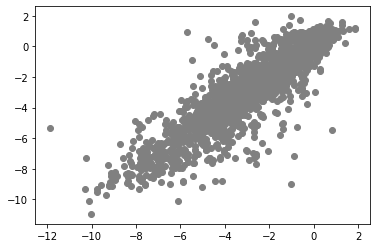

Learn metrics
R2: 0.8114180674653436
RMSE: 1.0254788949518887
NRMSE: 6.70 %
Test metrics
R2: 0.7768181721853182
RMSE: 1.147692576121472
NRMSE: 8.89 %


In [54]:
#Tworzymy sieć neuronową - prosze zobaczyć jakie parametry możemy modyfikować - optymalizować/tuningować
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=1000)

#Uczymy model
mlp.fit(X_train_scaled, y_train_scaled)

#Pamiętajmy, że po wykonaniu predykcji dane musimy ponownie skalować w celu obliczenia rzeczywistych wartości przewidywanych przez model: scaler*.inverse_transform
y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_pred_train)
modelResults("Test metrics", y_test, y_pred)

# Zapisywanie i wczytywanie modelu

In [57]:
#Zapiszmy nasz model na przyszłość używając pakietu pickle
import pickle

pickle.dump(mlp, open("MLP.mod", 'wb'))

In [56]:
#Wczytywanie modelu
model = pickle.load(open("MLP.mod", 'rb'))

# I koło się zamyka

In [66]:
#Wczytajmy większy zbiór danych i zastosujmy tzw. sieci głębokie (DNN)
df_full = pd.read_csv("https://raw.githubusercontent.com/adamPaclawski/AGH_DataScience_2021/master/Model_development_part1/extended_solubility.csv", index_col=0)

In [67]:
Y=df_full['logS']
df_full.drop(labels=['logS'], axis=1, inplace=True)

correlated_features = set()
correlation_matrix=df_full.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [68]:
nocorr_df_full=df_full.drop(labels=correlated_features, axis=1, inplace=False)

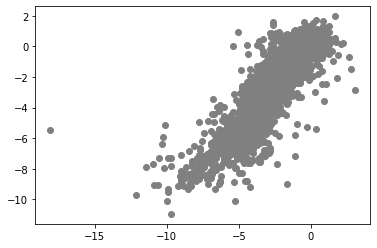

Learn metrics
R2: 0.7387305931036834
RMSE: 1.207038062973662
NRMSE: 7.88 %
Test metrics
R2: 0.705794647823676
RMSE: 1.3177148551600075
NRMSE: 10.20 %


In [69]:
#Przygotujemy model regresji liniowej
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    nocorr_df_full, Y, test_size=0.20, random_state=42, shuffle=True)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_learn_pred = reg.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


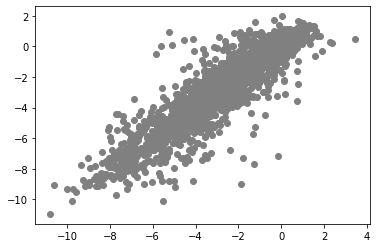

Learn metrics
R2: 0.8572068003728283
RMSE: 0.8923401792059458
NRMSE: 5.83 %
Test metrics
R2: 0.7924431508198124
RMSE: 1.1067886376755778
NRMSE: 8.57 %


In [70]:
#Model sieci neuronowej
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    nocorr_df_full, Y, test_size=0.20, random_state=42, shuffle=True)

scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train.values.reshape(-1,1))
y_train_scaled=scalerY.transform(y_train.values.reshape(-1,1))
y_test_scaled=scalerY.transform(y_test.values.reshape(-1,1))

#Tworzymy sieć neuronową - prosze zobaczyć jakie parametry możemy modyfikować - optymalizować/tuningować
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=10000)

#Uczymy model
mlp.fit(X_train_scaled, y_train_scaled)

#Pamiętajmy, że po wykonaniu predykcji dane musimy ponownie skalować w celu obliczenia rzeczywistych wartości przewidywanych przez model: scaler*.inverse_transform
y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_pred_train)
modelResults("Test metrics", y_test, y_pred)

# Sieci głębokie (DNN)

In [72]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    nocorr_df_full, Y, test_size=0.20, random_state=42, shuffle=True)

scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train.values.reshape(-1,1))
y_train_scaled=scalerY.transform(y_train.values.reshape(-1,1))
y_test_scaled=scalerY.transform(y_test.values.reshape(-1,1))

model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

model.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=500)

Epoch 1/1000
16/16 [==============================] - 7s 9ms/step - loss: 0.2512 - mean_squared_error: 0.3178
Epoch 2/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.1042 - mean_squared_error: 0.1663
Epoch 3/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0813 - mean_squared_error: 0.1333
Epoch 4/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0653 - mean_squared_error: 0.1144
Epoch 5/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0561 - mean_squared_error: 0.1018
Epoch 6/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0466 - mean_squared_error: 0.0923
Epoch 7/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0418 - mean_squared_error: 0.0846
Epoch 8/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0382 - mean_squared_error: 0.0785
Epoch 9/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0348 - mean_squared_error: 0.0734
Epoch 10/

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               47000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

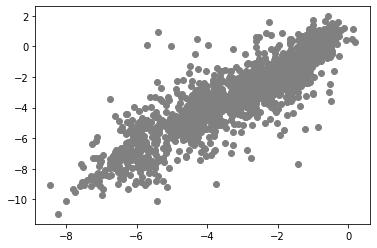

Learn metrics
R2: 0.8361039068133514
RMSE: 0.9560068110867198
NRMSE: 6.24 %
Test metrics
R2: 0.777920906322598
RMSE: 1.1448537092855198
NRMSE: 8.86 %


In [74]:
y_pred = scalerY.inverse_transform(model.predict(X_test_scaled))
y_pred_train = scalerY.inverse_transform(model.predict(X_train_scaled))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_pred_train)
modelResults("Test metrics", y_test, y_pred)

# Czy to już wszystko?

Istnieje duża liczba narzędzi, algorytmów jak i tranformacji danych, które mogą zostać zastosowane w procesie budowy modelu. Zachęcam do dalszych eksperymentów w zakresie modyfikacji parametróa jak i wprowadzania transformacji danych. Życzę samych sukcesów w Data Science. Adam Pacławski